# Домашнее задание №1.
## Выполнил: Бобровских Глеб, БПМ151.

In [107]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [108]:
train = pd.read_table('data/data/train_86_by_71.txt', header=None)
val = pd.read_table('data/data/valid_20_by_71.txt', header=None)
test = pd.read_table('data/data/test_12_by_70.txt', header=None)

In [109]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
0,1.0,22.505,4.892,1.957,0.000,1.957,23.483,7.828,5.871,4.892,...,0.978,0.978,0.978,0.000,11.742,3.914,6.849,3.914,4.892,0.0
1,2.0,25.313,1.830,0.305,4.575,26.532,3.660,2.440,16.468,2.440,...,5.185,2.135,1.220,1.220,10.369,0.610,3.965,5.489,8.234,0.0
2,2.0,27.719,1.808,2.410,0.904,5.423,28.322,2.712,5.725,8.738,...,3.616,3.013,0.301,0.603,7.834,4.218,3.616,6.629,4.519,0.0
3,2.0,17.879,2.774,0.925,3.699,22.503,2.158,5.240,11.714,3.391,...,0.617,0.308,4.316,2.158,6.165,0.617,3.083,7.090,2.158,0.0
4,2.0,28.475,3.947,1.128,4.793,16.916,3.383,4.511,7.612,4.229,...,1.692,2.537,0.846,1.692,7.330,0.282,4.229,2.255,6.202,0.0


In [110]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,17.526,1.002,5.008,0.501,4.507,19.029,3.505,7.511,18.027,20.030,...,0.501,3.005,1.002,2.504,12.519,3.005,7.511,6.009,3.005,0.0
1,16.765,2.719,3.172,0.453,2.719,24.468,2.266,11.781,10.874,19.483,...,1.812,0.906,2.266,1.359,13.593,3.625,10.874,1.359,2.719,0.0
2,23.506,8.325,1.959,0.490,1.959,23.506,3.918,6.366,5.877,24.976,...,0.000,2.938,1.469,0.490,14.202,1.469,9.794,5.387,4.897,0.0
3,20.036,1.214,3.643,0.607,6.679,25.501,1.821,9.107,8.500,28.537,...,0.607,1.214,0.000,1.214,12.143,3.036,0.607,6.679,13.358,0.0
4,22.150,0.923,4.153,1.846,2.769,28.611,2.769,8.768,10.152,23.535,...,1.846,1.846,1.846,0.461,10.614,1.846,11.537,5.076,2.769,0.0


In [111]:
# бинаризируем таргеты;
y_tr = np.asarray(train[0].apply(lambda a: 0 if a==1 else 1))
X_tr = np.asarray(train.drop(0, axis=1))
y_val = np.asarray(val[0].apply(lambda a: 0 if a==1 else 1))
X_val = np.asarray(val.drop(0, axis=1))
X_ts = np.asarray(test)

### Задание 1. Логистическа Регрессия.
<br> **Дефолтные параметры. Метрики качества - confusion matrix, precision/recall, auc-roc.**

In [112]:
lr = LogisticRegression(random_state=42)
lr.fit(X_tr, y_tr)
pred = lr.predict(X_val)
y_proba = lr.predict_proba(X_val)

### Confusion Matrix.

In [113]:
# определим функцию для отрисовки confusion matrix, см sklearn :)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[10  2]
 [ 0  8]]


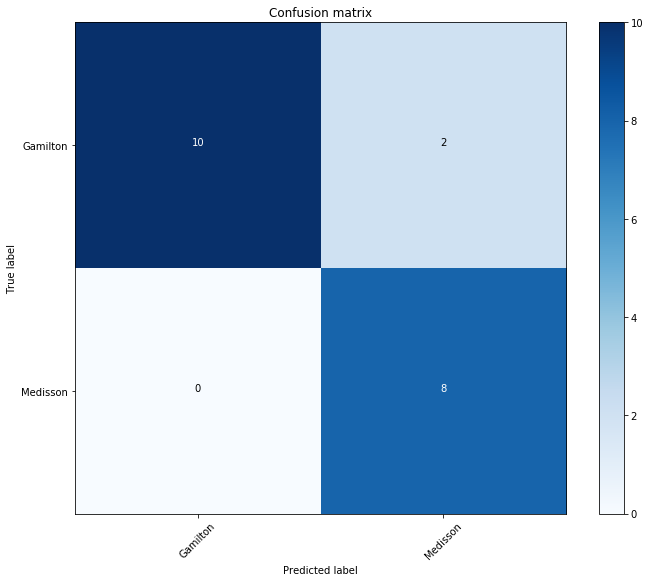

In [114]:
cnf_matrix = confusion_matrix(y_val, pred)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Gamilton', 'Medisson'],
                      title='Confusion matrix')

### Precision and Recall.

Presision(точность) и Recall (полнота):

* $ presision = {TP \over TP + FP}$
* $ recall = {TP \over TP + FN}$
 
Precision можно интерпретировать как *долю объектов, названных классификатором положительными* и при этом действительно *являющимися положительными*, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгорим. <br>
FN - а на самом деле True, TP - действительно True, FP - а на самом деле False.

** Compute manualy from cfg_matrix:<br>**
pres, rec = (cnf_matrix[0][0] / (cnf_matrix[0][0] + cnf_matrix[0][1])), (cnf_matrix[0][0] / (cnf_matrix[0][0] + cnf_matrix[1][0]))

**Compute through prec._recal._curve:<br>**
precision, recall, thresholds = precision_recall_curve(y_val, pred)

In [115]:
def scores(y_true, y_pred, y_proba):
    cnf_matrix = confusion_matrix(y_true, y_pred)
    print(cnf_matrix)
    
    print('Presicion: %f'%precision_score(y_true, y_pred))
    print('Recall: %f'%recall_score(y_true, y_pred))
    
    fpr, tpr, threshold = roc_curve(y_true, y_proba[:, 1])
    fig = plt.figure(figsize=(15, 8))
    fig.add_subplot(1, 2, 1)   
    plt.plot(fpr, tpr)
    plt.plot(np.linspace(0, 1), np.linspace(0, 1))
    plt.title('ROC: AUC=%0.2f' % auc(fpr, tpr))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.tight_layout(10)
    
    fig.add_subplot(1, 2, 2)   
    precision, recall, threshold = precision_recall_curve(y_true, y_proba[:, 1])
    plt.plot(recall, precision)
    plt.plot(np.linspace(0, 1), np.linspace(0, 1))
    plt.title('Precision-Recall: AUC=%0.2f' % auc(recall, precision))
    plt.xlabel('Precision')
    plt.ylabel('Recall');

[[10  2]
 [ 0  8]]
Presicion: 0.800000
Recall: 1.000000


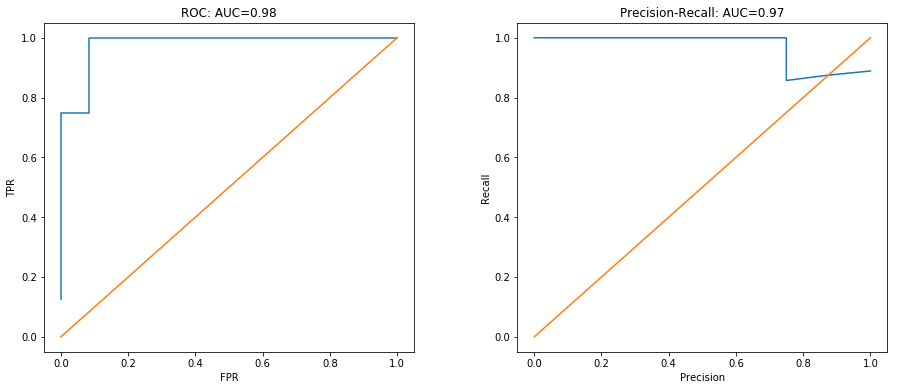

In [116]:
scores(y_val, pred, y_proba)

### Задание 2. Нормализация.
** Нормализация фичей для улучшения предсказания. Метрики качества - те же что и в предыдущем задании. **

In [119]:
X = np.append(X_tr, X_ts, axis=0)
X = np.append(X, X_val, axis=0)
mms = MinMaxScaler()
mms.fit(X)
X_tr = mms.transform(X_tr)
X_val = mms.transform(X_val)
X_ts = mms.transform(X_ts)

In [120]:
lr.fit(X_tr, y_tr)
pred_tr = lr.predict(X_val)
y_proba_tr = lr.predict_proba(X_val)

[[10  2]
 [ 0  8]]
Presicion: 0.800000
Recall: 1.000000


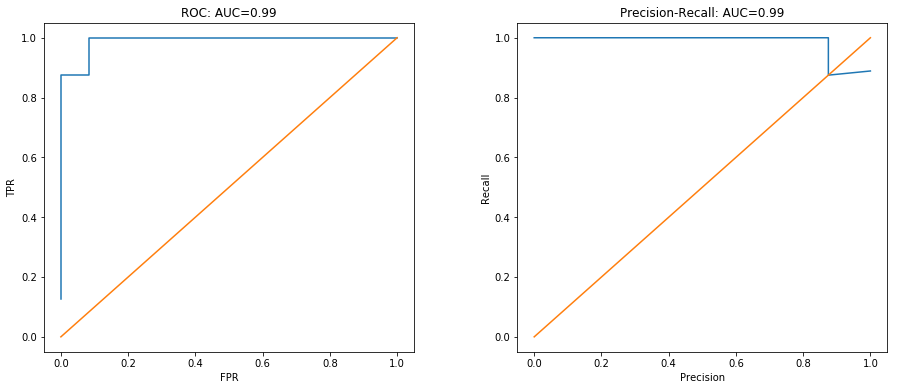

In [122]:
scores(y_val, pred_tr, y_proba_tr)

### Задание 3. Подбор оптимальных параметров.
**Будем менять значения параметров С и типа регуляризации.**

In [123]:
scores_list = []

for i in 10.0**np.arange(-3, 5):
    
    for j in ['l1', 'l2']:
       
        lr = LogisticRegression(penalty=j, C=i)
        lr.fit(X_tr, y_tr)
        pred = lr.predict(X_val)
        y_proba = lr.predict_proba(X_val)
        
        fpr_tr, tpr_tr, threshold_tr = roc_curve(y_val, y_proba[:, 1])
        
        scores_list.append([i, j, precision_score(y_val, pred), recall_score(y_val, pred), auc(fpr_tr, tpr_tr)])

/home/bobrg/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [124]:
scores_df = pd.DataFrame(scores_list, columns=['C', 'penalty', 'Precision', 'Recall', 'AUC'])
scores_df

,C,penalty,Precision,Recall,AUC
0,0.001,l1,0.000000,0.000,0.500000
1,0.001,l2,0.750000,0.750,0.895833
2,0.010,l1,0.000000,0.000,0.500000
3,0.010,l2,0.750000,0.750,0.906250
4,0.100,l1,0.000000,0.000,0.500000
5,0.100,l2,0.777778,0.875,0.927083
6,1.000,l1,0.888889,1.000,1.000000
7,1.000,l2,0.800000,1.000,0.989583
8,10.000,l1,1.000000,1.000,1.000000
9,10.000,l2,0.888889,1.000,1.000000


### Лучшая модель: penalty=l1, C=10

[[12  0]
 [ 0  8]]
Presicion: 1.000000
Recall: 1.000000


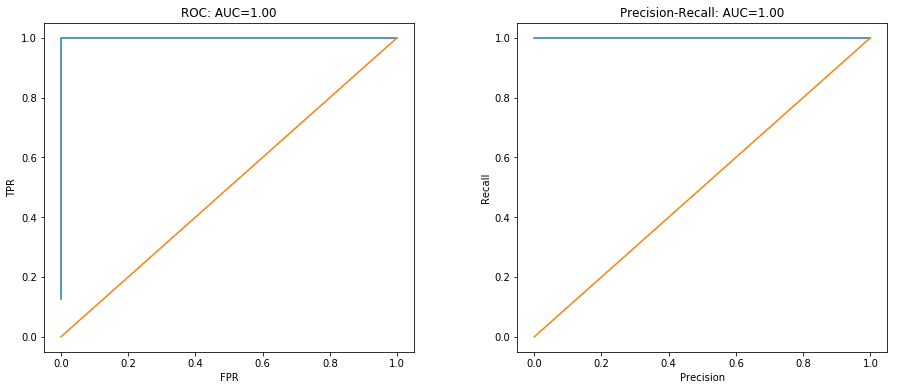

In [125]:
lr_best = LogisticRegression(penalty='l1', C=10)
lr_best.fit(X_tr, y_tr)
scores(y_val, lr_best.predict(X_val), lr_best.predict_proba(X_val))

### Задание 4. Метод опорных векторов.
**Построим SVM с дефолтными параметрами, после подберем лучший параметр С. Метрики качества precision/recall, auc-roc.**

[[10  2]
 [ 2  6]]
Presicion: 0.750000
Recall: 0.750000


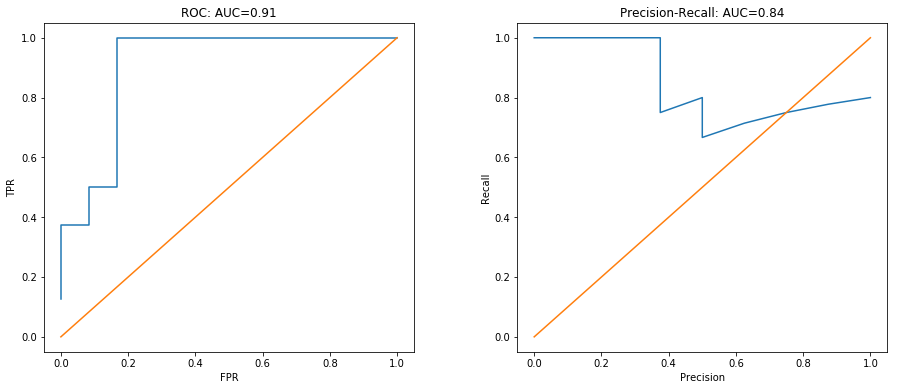

In [126]:
svc = SVC(probability=True)
svc.fit(X_tr, y_tr)
scores(y_val, svc.predict(X_val), svc.predict_proba(X_val))

In [127]:
scores_list = []
for i in 10.0**np.arange(-3, 5):
        
        svc = SVC(C=i, probability=True)
        svc.fit(X_tr, y_tr)
        pred = svc.predict(X_val)
        y_proba = svc.predict_proba(X_val)
        
        fpr_tr, tpr_tr, threshold_tr = roc_curve(y_val, y_proba[:, 1])
        
        scores_list.append([i, precision_score(y_val, pred), recall_score(y_val, pred), auc(fpr_tr, tpr_tr)])

/home/bobrg/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [128]:
scores_df = pd.DataFrame(scores_list, columns=['C', 'Precision', 'Recall', 'AUC'])
scores_df

,C,Precision,Recall,AUC
0,0.001,0.00,0.00,0.104167
1,0.010,0.00,0.00,0.104167
2,0.100,0.00,0.00,0.104167
3,1.000,0.75,0.75,0.906250
4,10.000,0.80,1.00,1.000000
5,100.000,0.80,1.00,1.000000
6,1000.000,0.80,1.00,1.000000
7,10000.000,0.80,1.00,1.000000


### Лучшая модель: C=10

[[10  2]
 [ 0  8]]
Presicion: 0.800000
Recall: 1.000000


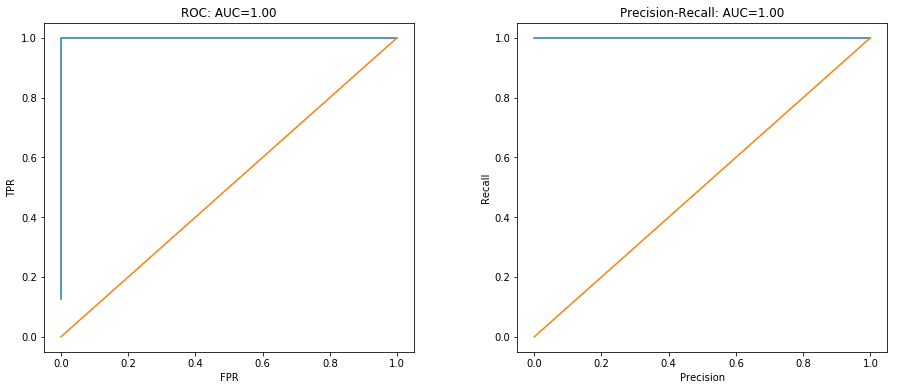

In [134]:
svc_best = SVC(C=10, probability=True)
svc_best.fit(X_tr, y_tr)
scores(y_val, svc_best.predict(X_val), svc_best.predict_proba(X_val))

### Задание 5. Предсказания.
** Делаем предсказания моделями с лучшими параметрами. **

In [137]:
pred_ts_lr = lr_best.predict(X_ts)
pred_ts_svc = svc_best.predict(X_ts)
proba_ts_lr = lr_best.predict_proba(X_ts)
proba_ts_svc = svc_best.predict_proba(X_ts)

In [148]:
preds_df = pd.DataFrame(np.concatenate((pred_ts_lr.reshape(-1, 1), proba_ts_lr[:, 1].reshape(-1, 1), pred_ts_svc.reshape(-1, 1), proba_ts_svc[:, 1].reshape(-1, 1)), axis=1), columns=['lr_preds','lr_proba_1', 'svc_preds', 'svc_proba_1'])
preds_df

,lr_preds,lr_proba_1,svc_preds,svc_proba_1
0,1.0,0.983672,1.0,0.807657
1,1.0,0.995429,1.0,0.943242
2,0.0,0.314954,0.0,0.484104
3,1.0,0.938810,1.0,0.904150
4,1.0,0.993290,1.0,0.870032
5,1.0,0.994750,1.0,0.933975
6,1.0,0.930387,1.0,0.625486
7,1.0,0.995997,1.0,0.969977
8,1.0,0.997660,1.0,0.797290
9,1.0,0.983389,1.0,0.718099


**Как видим логистическая регрессия больше уверена в своих ответах, нежели метод опорных векторов. Однако обе модели выдали одинаковые итоговые предсказания для классификации.**<br>
# P.S. А еще меньше данных дать нельзя было?